                                           VERİ HAZIRLAMA/DÜZENLEME/TEMİZLEME

In [36]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import ast

raw = pd.read_csv("raw_titles.csv")

In [37]:
raw.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


In [38]:
# Veri setinin genel durumu
raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5806 non-null   int64  
 1   id                    5806 non-null   object 
 2   title                 5805 non-null   object 
 3   type                  5806 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 589.8+ KB


In [39]:
# Eksik değerlerin kontrolü
bos_degerler = raw.isnull().sum()
print(bos_degerler)

# Eksik verilerin yüzdesini hesaplama
bos_deger_orani = (bos_degerler / len(raw)) * 100
print(bos_deger_orani)

index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64
index                    0.000000
id                       0.000000
title                    0.017224
type                     0.000000
release_year             0.000000
age_certification       44.953496
runtime                  0.000000
genres                   0.000000
production_countries     0.000000
seasons                 64.743369
imdb_id                  7.647261
imdb_score               9.007923
imdb_votes               9.283500
dtype: float64


Burada hangi sütunda kaç adet null değeri var ve oranını gösteriyor.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# imdb_votes sütunundaki eksik olmayan ve eksik olan satırları ayırma
train_data = raw[raw['imdb_votes'].notnull()]
test_data = raw[raw['imdb_votes'].isnull()]

# Özellikleri (X) ve hedefi (y) belirleme
features = ['runtime', 'imdb_score']
X_train = train_data[features]
y_train = train_data['imdb_votes']
X_test = test_data[features]

# Eksik verilerin yerine bir tahmin modeli eğitme
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Eksik imdb_votes değerlerini tahmin etme
predicted_votes = model.predict(X_test)

# Tahmin edilen değerlerle sadece imdb_votes sütunundaki eksik hücreleri doldurma
raw.loc[raw['imdb_votes'].isnull(), 'imdb_votes'] = predicted_votes



In [41]:
from sklearn.ensemble import RandomForestRegressor

# imdb_score sütunundaki eksik olmayan ve eksik olan satırları ayırma
train_data = raw[raw['imdb_score'].notnull()]
test_data = raw[raw['imdb_score'].isnull()]

# Özellikleri (X) ve hedefi (y) belirleme
features = ['runtime', 'imdb_votes']
X_train = train_data[features]
y_train = train_data['imdb_score']
X_test = test_data[features]

# Model oluşturma
model = RandomForestRegressor(random_state=42)

# Model eğitimi
model.fit(X_train, y_train)

# Eksik imdb_score değerlerini tahmin etme
predicted_scores = model.predict(X_test)

# Tahmin edilen değerlerle yalnızca imdb_score sütunundaki eksik hücreleri doldurma
raw.loc[raw['imdb_score'].isnull(), 'imdb_score'] = predicted_scores


yukarıda makine öğrenmesi tekniğiyle imdb_score ve imdb_votes sütunundaki NaN değerlerini doldurdum.

age_certification, seasons, imdb_id sütunları analizimiz için önemli olmayacağı/bir katkı sağlamayacağı için 
bu sütunları aşağıdaki kod bloğu ile kaldıracağım

In [42]:
raw = raw.drop(columns=['age_certification', 'seasons', 'imdb_id'])

gereksiz ve NaN içeren sütunları kaldırdım

In [43]:
raw=raw[raw['title'].notna()] 


title sütunundaki 1 veriyi kaldırdım

In [44]:
# raw.info()
raw.isnull().sum()

index                   0
id                      0
title                   0
type                    0
release_year            0
runtime                 0
genres                  0
production_countries    0
imdb_score              0
imdb_votes              0
dtype: int64

In [45]:
empty_rows_count = raw.apply(lambda row: any(cell == '[]' for cell in row), axis=1).sum()
empty_rows_count

np.int64(272)

verisetimizde nan olarak görünmeyen ama içeriği boş olan [] şeklinde liteler bulunuyor yukarıdaki kod bloğu kaç adet [] boş liste olduğunu gösteriyor.

In [46]:
# genre ve production_countries sütunlarındaki boş listeleri kontrol edip, bu satırları kaldırıyoruz
raw = raw[~raw['genres'].apply(lambda x: x == '[]')]
raw = raw[~raw['production_countries'].apply(lambda x: x == '[]')]



[] şeklinde boş listeleri içere satrları kaldırdım

In [47]:
empty_rows_count = raw.apply(lambda row: any(cell == '[]' for cell in row), axis=1).sum()
empty_rows_count

np.int64(0)

Görüldüğü gibi [] boş listler kaldırıldı.

NaN değerlerini ve [] boş listeleri temizledik artık analizlerimize başlayabiliriz

In [48]:
# Genel istatistikler
print("Toplam Kayıt:", len(raw))
print("Film Sayısı:", len(raw[raw['type'] == 'MOVIE']))
print("Dizi Sayısı:", len(raw[raw['type'] == 'SHOW']))
print("Ortalama IMDb Puanı:", raw['imdb_score'].mean())
print("En Yaygın Tür:", raw['genres'].explode().mode()[0])
print("En Yaygın Ülke:", raw['production_countries'].explode().mode()[0])


Toplam Kayıt: 5533
Film Sayısı: 3588
Dizi Sayısı: 1945
Ortalama IMDb Puanı: 6.543050442797759
En Yaygın Tür: ['comedy']
En Yaygın Ülke: ['US']


Aşağıdaki analizlerimde drama türünün popüler olduğu fakat yukarıdaki analizde en yaygın tür comedy oldğu görülüyor.
Bunun sebei tür sütununda veriler ['comedy','drama'] gibi tutuluyor ve bu satırları sayıyor bu yüzden yanıltıcı olabiliyor.
Bunu daha tutarlı hale getirmek için genres sütunun her hücresindeki listenin ilk değerini aldım. Yani Yukarıdaki liste örneğinde Comedy asıl tür olarak alınıyor. 
Örneğin, ['drama','thriller','scifi'] bu listede ise Drama asıl tür olarak alınıyor.

                                    📚📚 GÖRSELLEŞTİRMELER VE ANALİZ KISIMLARI 📚📚

                                            🕛🕛Puan ile Süre İlişkisi🕛🕛

In [49]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5533 entries, 0 to 5803
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5533 non-null   int64  
 1   id                    5533 non-null   object 
 2   title                 5533 non-null   object 
 3   type                  5533 non-null   object 
 4   release_year          5533 non-null   int64  
 5   runtime               5533 non-null   int64  
 6   genres                5533 non-null   object 
 7   production_countries  5533 non-null   object 
 8   imdb_score            5533 non-null   float64
 9   imdb_votes            5533 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 475.5+ KB


In [50]:
max_puan=raw['imdb_score'].max()
max_puanli_film=raw[raw['imdb_score']==max_puan]
max_puanli_film

,index,id,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes
243,243,ts4,Breaking Bad,SHOW,2008,48,"['drama', 'thriller', 'crime']",['US'],9.5,1727694.0


En yüksek puanlı dizi 9.5 ile Braking Bad olmuş.

In [51]:
min_puan=raw['imdb_score'].min()
min_puanli_film=raw[raw['imdb_score']==min_puan]
min_puanli_film

,index,id,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes
1757,1757,tm549892,Aerials,MOVIE,2016,90,"['drama', 'scifi', 'thriller']",['AE'],1.5,382.0


En düşük puanlı film 1.5 puanla Aerials olmuş.

In [52]:
# Puan ve oy sayısına dayalı puanlama
raw['normalized_score'] = raw['imdb_score'] * raw['imdb_votes']

# oy sayısına göre En yüksek ve en düşük puanı bulma
max_oy_skor = raw['normalized_score'].max()
min_oy_skor = raw['normalized_score'].min()

# Bu değerlere sahip filmleri bulma
max_oylu_film = raw[raw['normalized_score'] == max_oy_skor]
min_oylu_film = raw[raw['normalized_score'] == min_oy_skor]

# Sonuçlar
print("kullanılan oya göre en yüksek puanlı film/dizi:")
print(max_oylu_film[['title', 'imdb_score', 'imdb_votes', 'normalized_score']])

print("\nkullanılan oya göre en düşük puanlı film/dizi:")
print(min_oylu_film[['title', 'imdb_score', 'imdb_votes', 'normalized_score']])

kullanılan oya göre en yüksek puanlı film/dizi:
         title  imdb_score  imdb_votes  normalized_score
260  Inception         8.8   2268288.0        19960934.4

kullanılan oya göre en düşük puanlı film/dizi:
        title  imdb_score  imdb_votes  normalized_score
98  High Risk         3.8         6.0              22.8


şimdi de süre ve oy arasındaki ilişkileri inceleyeceğiz.

In [53]:
raw['imdb_score'].describe()

count    5533.000000
mean        6.543050
std         1.118805
min         1.500000
25%         5.900000
50%         6.627000
75%         7.300000
max         9.500000
Name: imdb_score, dtype: float64

ortalama puan 6.54
en yüksek puan 9.5
en düşük puan 1.5
ve standart sapması 1.11

In [54]:
raw['runtime'].describe()

count    5533.000000
mean       78.745165
std        39.468117
min         0.000000
25%        45.000000
50%        86.000000
75%       105.000000
max       251.000000
Name: runtime, dtype: float64

minimum 0 dakika olan içerik varmış ?? hesaplamalarımızda 0 olan satırları işleme dahil etmeyeceğim
maksimum 251 dakika olan içerik varmış
içeriklerin ortalama süresi ise 79 dakikaymış

In [55]:
dakika=raw[raw['runtime']==251]
dakika

,index,id,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,normalized_score
34,34,tm188894,The School of Mischief,MOVIE,1973,251,['comedy'],['EG'],6.739,20112.33,135536.99187


In [56]:
dakika=raw[raw['runtime']==0]
dakika

,index,id,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,normalized_score
472,472,ts74931,Kung Fu Panda Awesome Secrets,SHOW,2008,0,"['action', 'comedy', 'family', 'animation']",['US'],7.200,55.000000,396.000000
478,478,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,2005,0,"['animation', 'comedy', 'family']",['US'],6.500,96.000000,624.000000
561,561,ts67595,Pedro El Escamoso,SHOW,2001,0,"['drama', 'comedy']",['CO'],7.500,303.000000,2272.500000
896,896,ts99814,Masameer,SHOW,2011,0,"['comedy', 'animation']",['SA'],8.200,677.000000,5551.400000
2618,2618,ts74765,Daughters of Destiny,SHOW,2017,0,['documentation'],['IN'],8.600,900.000000,7740.000000
3165,3165,ts250172,Afronta!,SHOW,2017,0,['documentation'],['BR'],7.400,8.000000,59.200000
3752,3752,ts268592,Beyblade Burst Rise,SHOW,2019,0,"['action', 'scifi', 'sport', 'thriller', 'anim...",['XX'],5.700,156.000000,889.200000
3981,3981,ts217719,Basketball or Nothing,SHOW,2019,0,"['documentation', 'sport']",['US'],7.400,614.000000,4543.600000
3993,3993,ts255418,Bad Boy Billionaires: India,SHOW,2020,0,"['crime', 'documentation']",['XX'],7.900,3010.000000,23779.000000
4008,4008,ts237071,The Forest of Love: Deep Cut,SHOW,2020,0,"['crime', 'horror', 'thriller', 'drama']",['JP'],6.800,426.000000,2896.800000


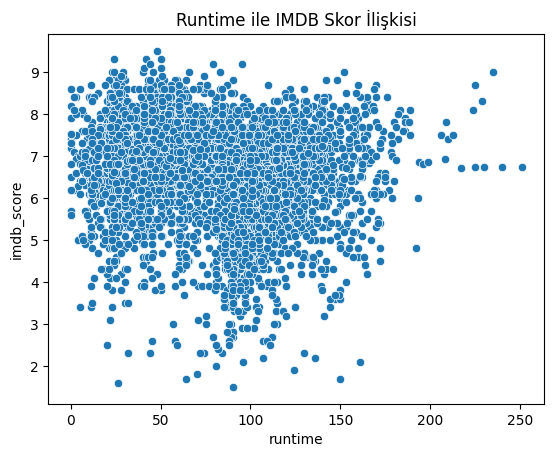

In [57]:
# imdb_score ve runtime arasındaki ilişki
sns.scatterplot(x='runtime', y='imdb_score', data=raw)
plt.title("Runtime ile IMDB Skor İlişkisi")
plt.show()

1. Yoğunluk: 

   Veri noktalarının büyük bir kısmı 50 ile 150 dakika arasındaki runtime değerlerinde yoğunlaşmıştır. Bu, çoğu filmin/dizinin bu süre  aralığında olduğu anlamına gelir.

2. Artan Süre ile Düşen Puanlar:

   Grafikte, runtime süresi arttıkça IMDb puanlarının genel olarak düştüğü gözlemlenmektedir. Özellikle 150 dakikanın üzerindeki runtime değerlerinde, yüksek puanlı yapımların sayısı azalmaktadır. Bu durum, uzun süren film/dizilerin izleyiciler tarafından daha az beğenildiği şeklinde yorumlanabilir. Ancak bu, tüm uzun yapımların kötü olduğu anlamına gelmez.

3. Kısa Süre ve Yüksek Puanlar:

   Kısa runtime'a sahip (özellikle 50 dakikanın altı) bazı yapımların yüksek IMDb puanlarına sahip olduğu görülmektedir. Bu durum, kısa ve öz anlatımların izleyiciler tarafından takdir edildiğini gösterebilir. Ancak aynı zamanda, çok düşük puanlı kısa yapımlar da bulunmaktadır, bu da sürenin tek başına kaliteyi belirlemediğini gösterir.

4. Genel Dağılım:

   Grafikteki veri noktaları oldukça dağınık bir şekilde yayılmıştır. Bu, runtime ve IMDb puanı arasında güçlü bir doğrusal ilişki olmadığını gösterir. Başka bir deyişle, bir filmin/dizinin süresi tek başına IMDb puanını belirleyen bir faktör değildir. Kalite, senaryo, oyunculuk gibi birçok farklı faktör de puanı etkilemektedir.

Özetle:
Grafik, film/dizi süresi ile IMDb puanı arasında net bir doğrusal ilişki olmadığını göstermektedir. Ancak, çok uzun yapımların genel olarak daha düşük puanlara sahip olduğu ve kısa ve öz yapımların da yüksek puan alabileceği gözlemlenmektedir. Sürenin tek başına kaliteyi belirlemediği, diğer faktörlerin de önemli olduğu unutulmamalıdır.

In [58]:
# Süresi 0 olan satırları filtreleme
filtrelenmis_veri = raw[raw['runtime'] > 0].copy()

# Süreyi kısa ve uzun olarak sınıflandırma
filtrelenmis_veri.loc[:, 'Kategori'] = filtrelenmis_veri['runtime'].apply(lambda x: 'Kısa' if x <= 78.7 else 'Uzun')

# Kısa ve uzun kategorilerin sayısı
print(filtrelenmis_veri['Kategori'].value_counts())


Kategori
Uzun    3014
Kısa    2500
Name: count, dtype: int64


Burada eşik değerimizi içeriklerin ortalama dakikası olan 78.7 dakika belirledik ve kategori sütunu oluşturup kısa ve uzun olarak sınıflandırdık.
görüldüğü gibi 3014 adet uzun içerik,
2519 adet kısa içerik bulunuyor.

Kategori
Kısa    6.884566
Uzun    6.255936
Name: imdb_score, dtype: float64


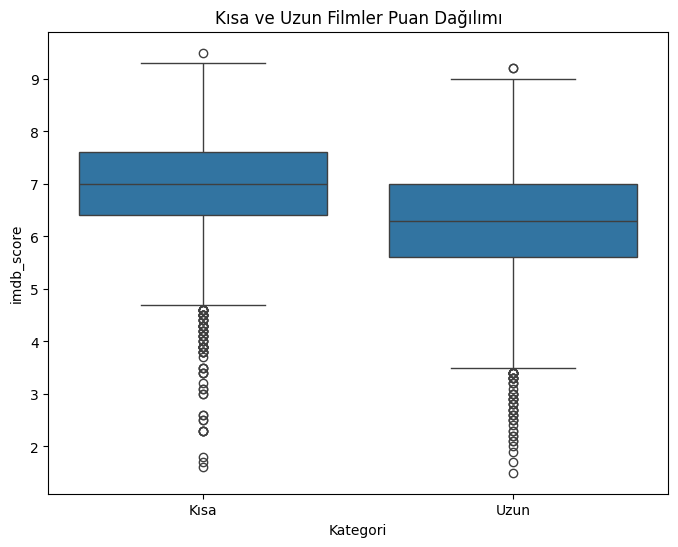

In [59]:
# Kısa ve uzun sınıflar için puan ortalamaları
kategori_ortalama_puan = filtrelenmis_veri.groupby('Kategori')['imdb_score'].mean()
print(kategori_ortalama_puan)

# Grafik
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kategori', y='imdb_score', data=filtrelenmis_veri)
plt.title('Kısa ve Uzun Filmler Puan Dağılımı')
plt.show()


kısa ve uzun film değerini aşağıdaki kod satırı ile 78.7 den büyük olan yapımlar uzun, bu değerden küçük olan yapımlar kısa olarak değerlendirlimiştir.
***filtrelenmis_veri.loc[:, 'Kategori'] = filtrelenmis_veri['runtime'].apply(lambda x: 'Kısa' if x <= 78.7 else 'Uzun')***

1. Medyan (Orta Değer):

   Kısa filmlerin medyan IMDb puanı, uzun filmlerin medyan puanından biraz daha yüksektir. Bu, genel olarak kısa filmlerin ortalama olarak biraz daha yüksek puanlar aldığını gösterir. Grafikte kutuların içindeki yatay çizgiler medyanı gösterir.

2. Çeyrekler Arası Aralık (IQR):

   IQR, kutunun yüksekliği ile temsil edilir ve verilerin %50'sinin hangi aralıkta olduğunu gösterir. Kısa ve uzun filmlerin IQR değerleri yaklaşık olarak benzerdir. Bu, her iki film kategorisinde de puanların benzer bir aralıkta dağıldığını gösterir.

3. Aykırı Değerler (Outliers):

   Grafikte, kutuların dışında noktalar olarak gösterilen çok sayıda aykırı değer bulunmaktadır. Bu, hem kısa hem de uzun filmler arasında çok yüksek veya çok düşük puanlara sahip filmlerin olduğunu gösterir. Özellikle kısa filmler tarafında, düşük puanlı aykırı değerlerin daha fazla olduğu görülmektedir. Bu, bazı kısa filmlerin çok düşük puanlar aldığını gösterir.

4. Dağılım:

   Her iki kategoride de puan dağılımı yaklaşık olarak simetriktir. Ancak, kısa filmlerde düşük puanlı aykırı değerlerin daha fazla olması, dağılımı biraz daha sola eğimli hale getirir.

Özetle:

Kısa filmlerin medyan puanı uzun filmlerden biraz daha yüksektir.
Her iki kategoride de puan dağılımı benzerdir ve çok sayıda aykırı değer bulunmaktadır.
Kısa filmlerde düşük puanlı aykırı değerlerin daha fazla olması dikkat çekicidir.

In [60]:
# Kısa ve uzun filmler için toplam oy sayısı
kategori_toplam_oy = filtrelenmis_veri.groupby('Kategori')['imdb_votes'].sum()
print(kategori_toplam_oy)

Kategori
Kısa    3.432239e+07
Uzun    9.249913e+07
Name: imdb_votes, dtype: float64


kısa içeriklere toplam 34M kişi oy vermiş (<78dk)
uzun içeriklere 89M kişi oy vermiş (>78dk)

Genel Yorum:

1. Puan ve Süre Arasındaki İlişki:

   Kısa filmler/diziler, genellikle daha yüksek ve tutarlı puanlara sahipken, uzun filmler/diziler daha geniş bir puan aralığında değişkenlik göstermektedir.

2. Oy Sayısı ve Popülerlik:

   Uzun içeriklerin, kısa içeriklere kıyasla daha fazla oy aldığını ve dolayısıyla daha popüler olduğunu görüyoruz. Bu, uzun filmlerin/dizilerin izleyiciler tarafından daha çok izlendiğini veya daha çok değerlendirildiğini gösterir.
   
3. Korelasyon: 

   Her iki kategori için de puan aralıklarının benzer olduğunu, ancak uzun içeriklerin daha popüler olmasına rağmen medyan puanın çok büyük bir farkla öne çıkmadığını görüyoruz. Bu durum, sürenin izleyici ilgisi üzerinde etkili olduğunu ancak puanların değerlendirilmesinde çok güçlü bir etkiye sahip olmadığını gösterir.

Süre ile puan arasındaki korelasyon:  -0.178029892608458
Süre ile oy arasındaki korelasyon:  0.2583621499301905


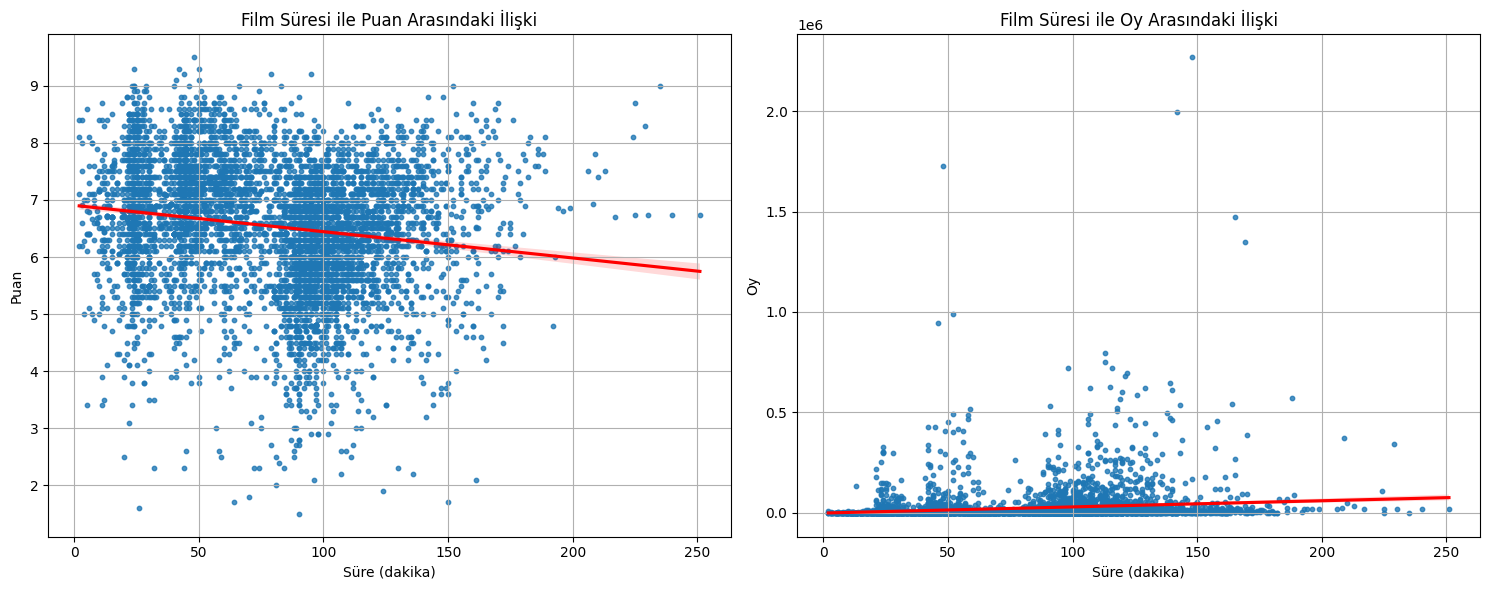

In [61]:
# Korelasyon ve p-değeri hesaplama
korelasyon1, p_deger1 = spearmanr(filtrelenmis_veri['runtime'], filtrelenmis_veri['imdb_score'])
print("Süre ile puan arasındaki korelasyon: ", korelasyon1)

korelasyon2, p_deger2 = spearmanr(filtrelenmis_veri['runtime'], filtrelenmis_veri['imdb_votes'])
print("Süre ile oy arasındaki korelasyon: ", korelasyon2)

# Yan yana grafikler için subplot kullanma
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# üstteki scatter plot ve regresyon çizgisi
sns.regplot(data=filtrelenmis_veri, x='runtime', y='imdb_score', scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axs[0])
axs[0].set_title('Film Süresi ile Puan Arasındaki İlişki')
axs[0].set_xlabel('Süre (dakika)')
axs[0].set_ylabel('Puan')
axs[0].grid(True)

# alttaki scatter p. ve regresyon çizgisi
sns.regplot(data=filtrelenmis_veri, x='runtime', y='imdb_votes', scatter_kws={'s': 10}, line_kws={'color': 'red'}, ax=axs[1])
axs[1].set_title('Film Süresi ile Oy Arasındaki İlişki')
axs[1].set_xlabel('Süre (dakika)')
axs[1].set_ylabel('Oy')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Süre ve Puan Arasındaki Korelasyon:
Korelasyon Katsayısı: -0.178
Anlamı: Süre ile puan arasında hafif negatif bir korelasyon bulunmakta. Bu da film süresi arttıkça puanların azalma eğiliminde olduğunu gösterir. Ancak, bu ilişki zayıftır ve sürenin puanlar üzerinde belirgin bir etkisi olmadığını söylemek mümkündür.

Süre ve Oy Arasındaki Korelasyon:
Korelasyon Katsayısı: 0.258
Anlamı: Süre ile oy sayısı arasında hafif pozitif bir korelasyon bulunmakta. Bu, film süresi arttıkça oy sayısının da arttığını gösterir. Bu da daha uzun filmlerin izleyiciler tarafından daha fazla değerlendirildiğini ve oylandığını belirtir.

1. Film Süresi ile Puan Arasındaki İlişki

   A. Dağılım:
   Veri noktaları oldukça dağınık bir şekilde yayılmıştır, bu da film süresi ile puan arasında güçlü bir doğrusal ilişki olmadığını gösterir.

   B. Negatif Eğilim:
   Kırmızı çizgi (regresyon çizgisi), genel bir eğilimi gösterir ve hafif bir negatif eğilim olduğunu gösterir. Yani, film süresi arttıkça ortalama puanın biraz düştüğü söylenebilir. Ancak bu eğilim oldukça zayıftır.

   C. Yoğunluk:
   Veri noktalarının çoğu 50 ile 150 dakika arasındaki sürelerde yoğunlaşmıştır. Bu, çoğu filmin bu süre aralığında olduğunu gösterir.

   D. Aykırı Değerler:
   Grafikte, özellikle kısa süreli filmler arasında, yüksek puanlı aykırı değerler bulunmaktadır. Bu, bazı kısa filmlerin çok beğenildiğini gösterir.

1. Film Süresi ile Oy Sayısı Arasındaki İlişki

   A. Dağılım:
   Bu grafikte de veri noktaları dağınık bir şekilde yayılmıştır, ancak sol grafiğe göre daha belirgin bir pozitif eğilim görülmektedir.

   B. Pozitif Eğilim:
   Kırmızı çizgi, film süresi arttıkça oy sayısının da arttığını göstermektedir. Bu, uzun filmlerin genellikle daha fazla izleyici çektiği ve dolayısıyla daha fazla oy aldığı şeklinde yorumlanabilir.

   C. Yoğunluk:
   Oy sayısının düşük olduğu filmlerin çoğu kısa sürelidir. Uzun filmlerin ise genellikle daha fazla oy aldığı görülmektedir.

   D. Aykırı Değerler:
   Grafikte, özellikle uzun süreli filmler arasında, çok yüksek oy sayılarına sahip aykırı değerler bulunmaktadır. Bu, bazı uzun ve popüler filmlerin çok sayıda oy aldığını gösterir.

                                              ⏳⏳ ZAMANA GÖRE POPÜLER TÜRLER ⏳⏳

In [62]:
raw.head()

,index,id,title,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,normalized_score
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],6.813,3725.162681,2.537953e+04
1,1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],8.300,795222.000000,6.600343e+06
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],8.200,530877.000000,4.353191e+06
3,3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],8.000,392419.000000,3.139352e+06
4,4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],['US'],8.100,391942.000000,3.174730e+06


In [63]:
# Genres sütunundaki dizeleri listeye dönüştürme ve ilk türü alma
raw['first_genre'] = raw['genres'].apply(lambda x: ast.literal_eval(x)[0] if x != '[]' else 'Unknown')

# Yıl ve tür bazında film sayısını hesaplama
yil_tur_istatistikleri = raw.groupby(['release_year', 'first_genre']).agg(
    count=('first_genre', 'size')
).reset_index()

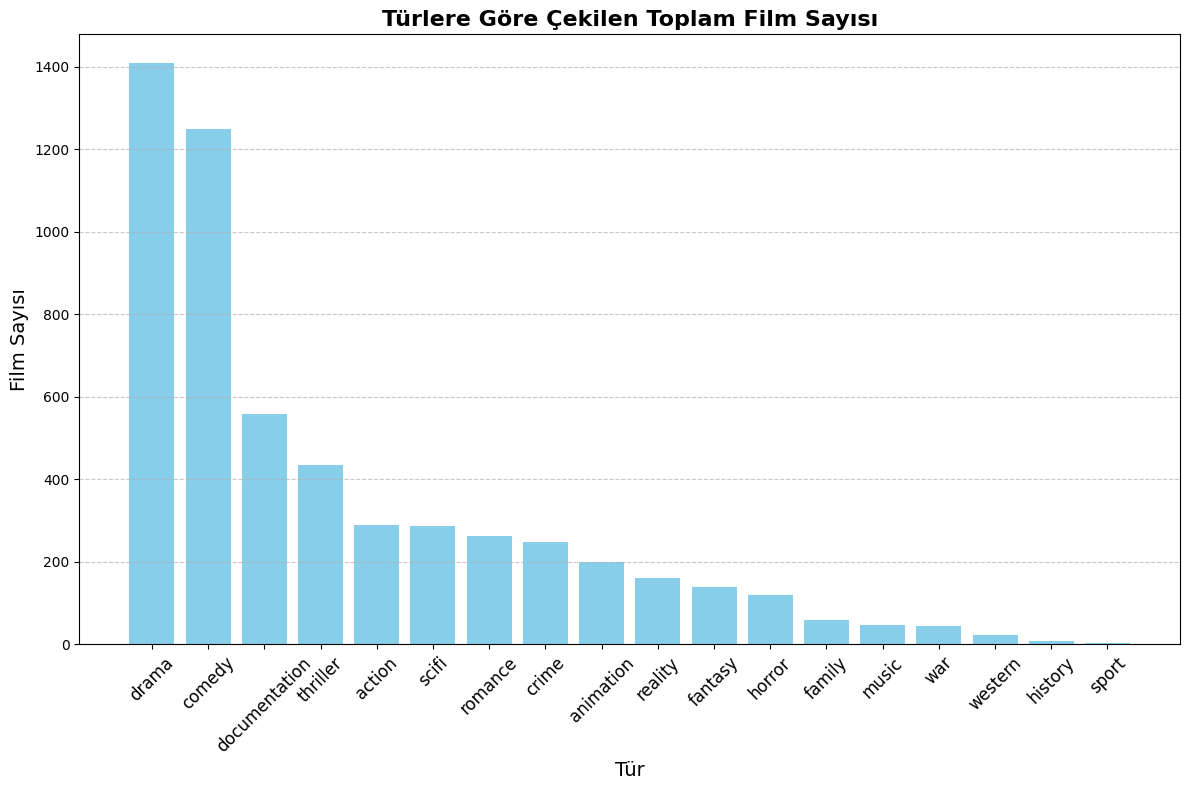

      first_genre  count
5           drama   1408
2          comedy   1248
4   documentation    559
15       thriller    434
0          action    288
13          scifi    286
12        romance    262
3           crime    247
1       animation    199
11        reality    161
7         fantasy    139
9          horror    119
6          family     59
10          music     47
16            war     43
17        western     22
8         history      8
14          sport      4


In [64]:
#pivot tablo
pivot_veri = yil_tur_istatistikleri.pivot(index='release_year', columns='first_genre', values='count').fillna(0)

# Her türden toplam kaç film çekildiğini hesaplama
tur_toplamlari = yil_tur_istatistikleri.groupby('first_genre')['count'].sum().reset_index()
tur_toplamlari = tur_toplamlari.sort_values(by='count', ascending=False)

# grafik
plt.figure(figsize=(12, 8))
plt.bar(tur_toplamlari['first_genre'], tur_toplamlari['count'], color='skyblue')
plt.title('Türlere Göre Çekilen Toplam Film Sayısı', fontsize=16, fontweight='bold')
plt.xlabel('Tür', fontsize=14)
plt.ylabel('Film Sayısı', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print(tur_toplamlari)

Burada hangi türden kaç adet çekildiğini görüyoruz.
en fazla çekilen tür 1408 adet ile drama olurken,
en az çekilen tür 4 adet ile sport olmuş.

C:\Users\kurte\AppData\Local\Temp\ipykernel_22216\2846615174.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('donem').apply(lambda x: x.nlargest(n, sutun)).reset_index(drop=True)
C:\Users\kurte\AppData\Local\Temp\ipykernel_22216\2846615174.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('donem').apply(lambda x: x.nlargest(n, sutun)).reset_index(drop=True)


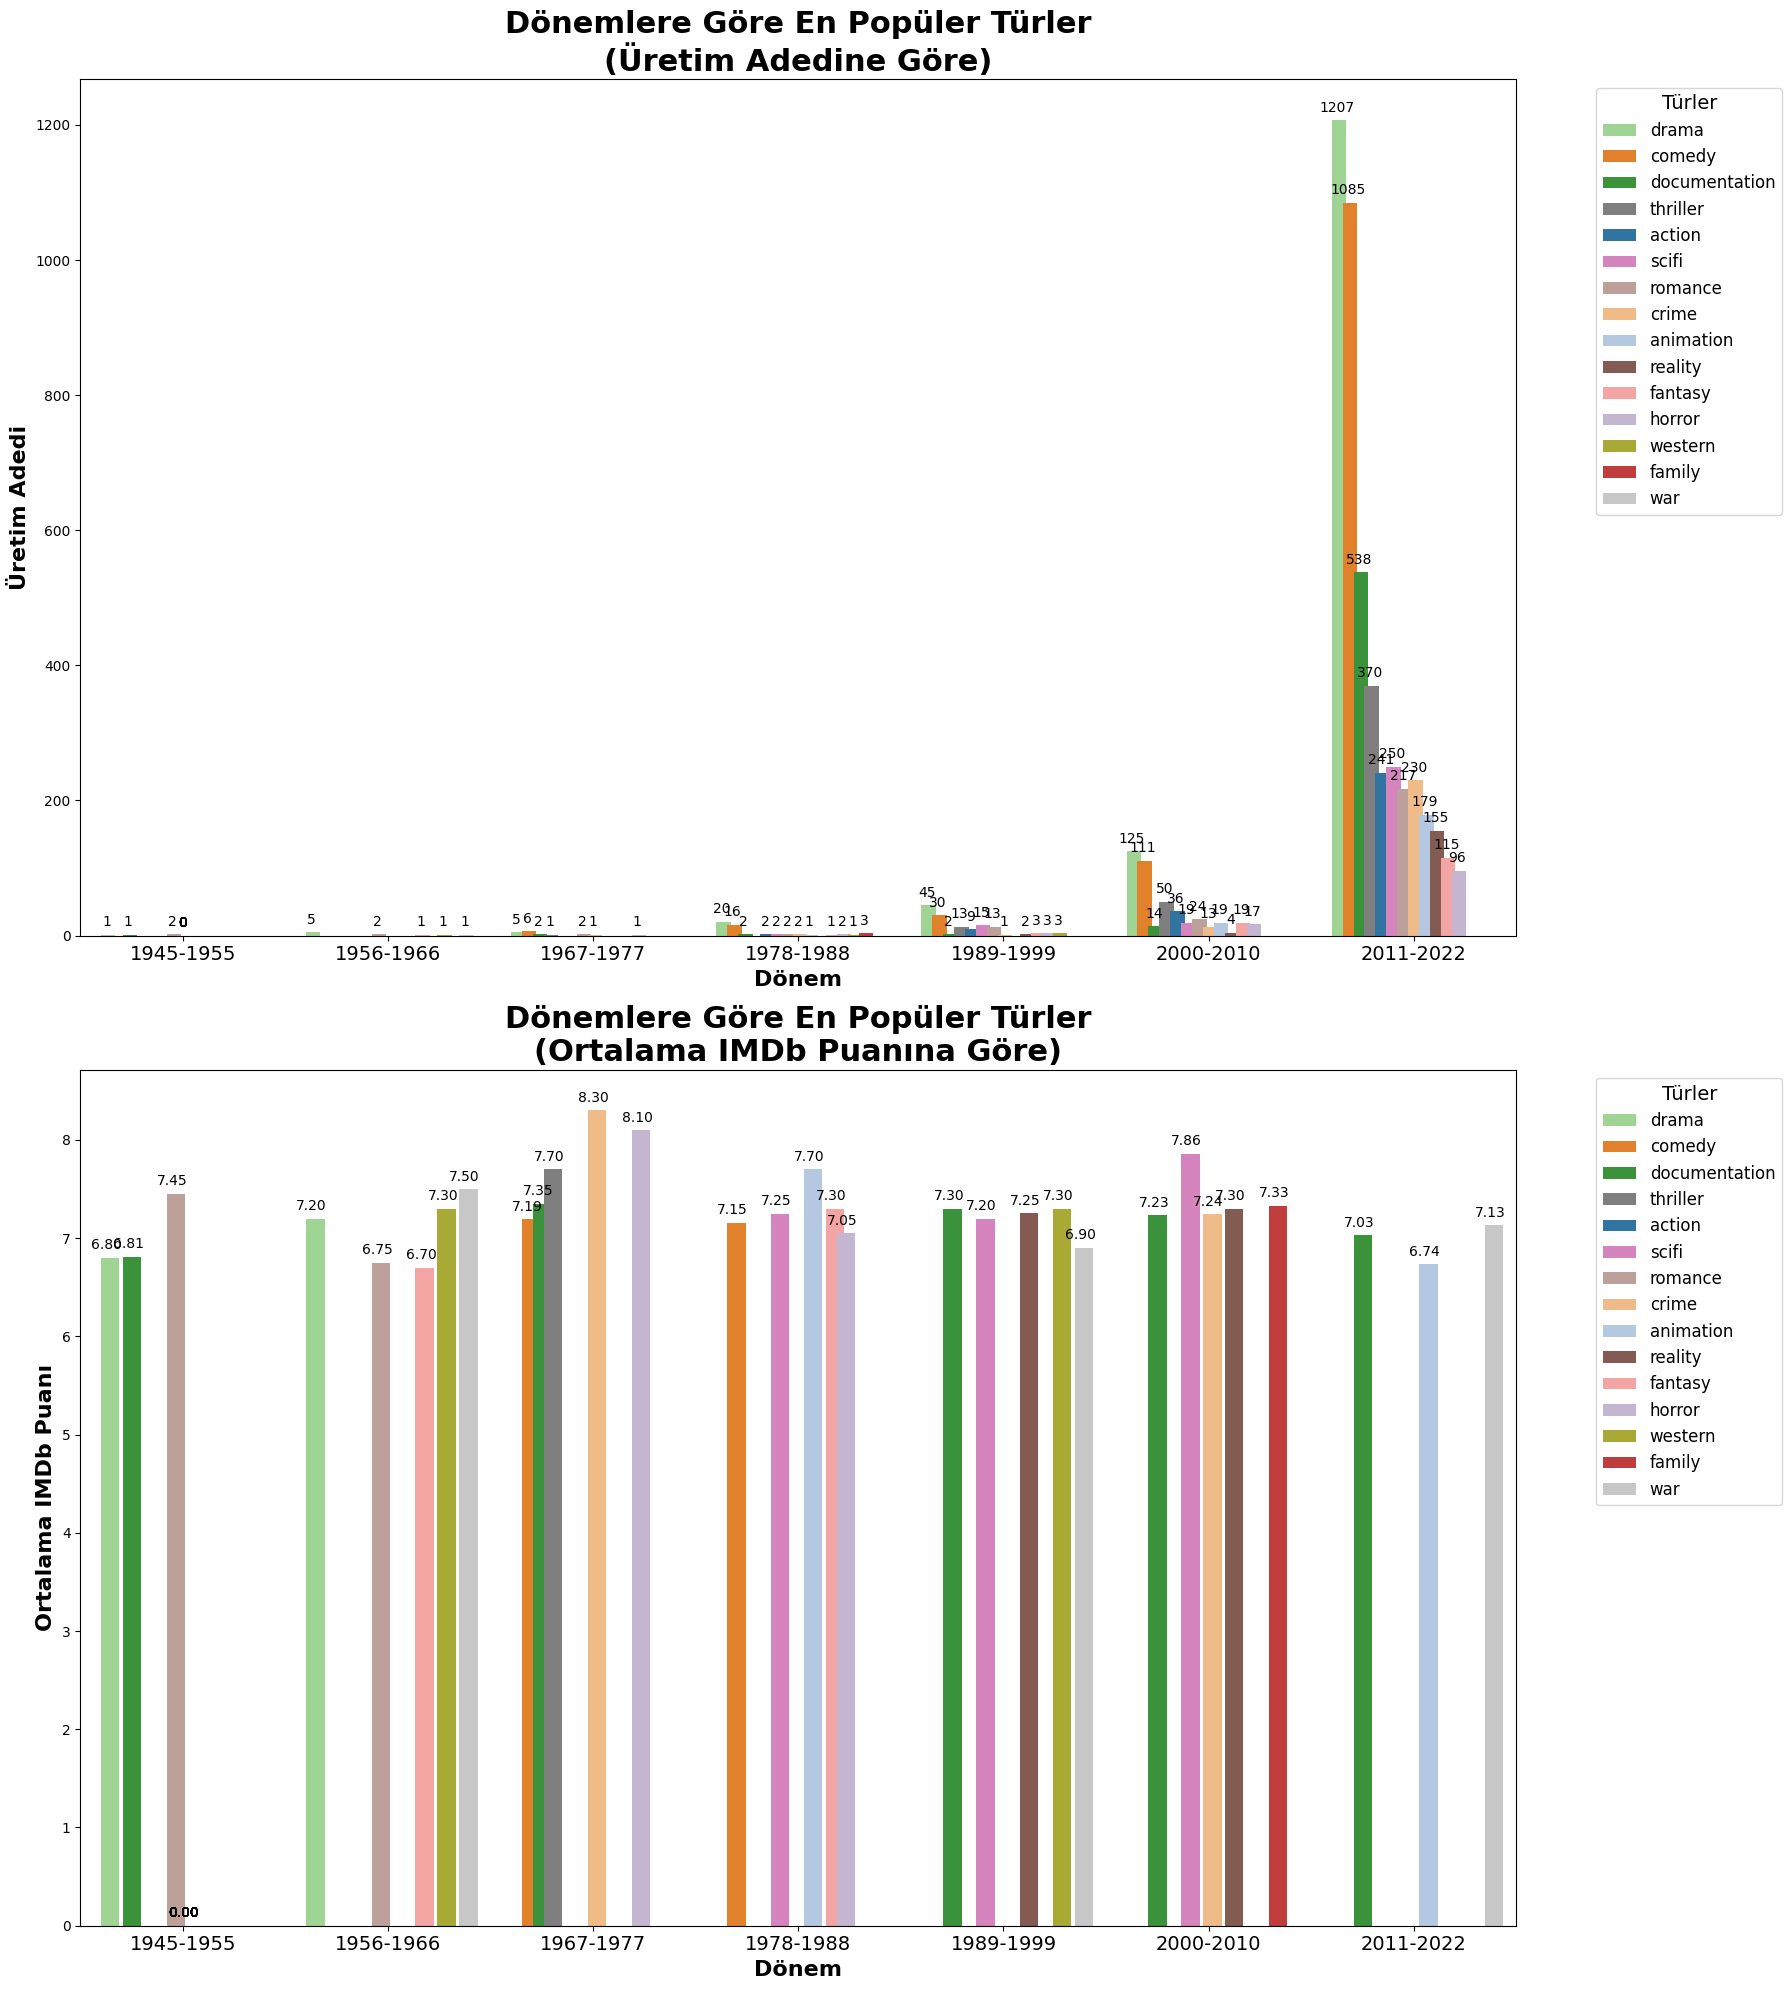

In [65]:
def yil_donemi_belirle(yil):
    donemler = {
        (1945, 1955): '1945-1955',
        (1956, 1966): '1956-1966',
        (1967, 1977): '1967-1977',
        (1978, 1988): '1978-1988',
        (1989, 1999): '1989-1999',
        (2000, 2010): '2000-2010',
        (2011, 2022): '2011-2022'
    }
    for (baslangic, bitis), donem in donemler.items():
        if baslangic <= yil <= bitis:
            return donem
    return 'Diğer'

# Veri işleme 
raw['donem'] = raw['release_year'].apply(yil_donemi_belirle)

donem_tur_istatistikleri = raw.groupby(['donem', 'first_genre']).agg(
    film_sayisi=('imdb_score', 'size'),
    ortalama_puan=('imdb_score', 'mean')
).reset_index()

# Popüler türleri belirleme
def en_populer_n(df, n, sutun):
    return df.groupby('donem').apply(lambda x: x.nlargest(n, sutun)).reset_index(drop=True)

en_populer_turler_adet = en_populer_n(donem_tur_istatistikleri, 12, 'film_sayisi')
en_populer_turler_puan = en_populer_n(donem_tur_istatistikleri, 5, 'ortalama_puan')

# Tür listesi ve renk eşleştirmesi
tum_turler = sorted(set(en_populer_turler_adet['first_genre']).union(set(en_populer_turler_puan['first_genre'])))
renk_paleti = sns.color_palette("tab20", n_colors=len(tum_turler))
renk_esleme = dict(zip(tum_turler, renk_paleti))

# Kategori sıralaması (En çoktan en aza)
kategori_siralamasi = en_populer_turler_adet.groupby('first_genre')['film_sayisi'].sum().sort_values(ascending=False).index.tolist()

# Grafik
fig, axes = plt.subplots(2, 1, figsize=(18, 20), facecolor='white')

def grafik_ciz(ax, data, y_sutun, baslik, y_etiket):
    sns.barplot(x='donem', y=y_sutun, hue='first_genre', data=data, palette=renk_esleme, ax=ax, hue_order=kategori_siralamasi)
    ax.set_title(baslik, fontsize=22, fontweight='bold')
    ax.set_xlabel('Dönem', fontsize=16, fontweight='bold')
    ax.set_ylabel(y_etiket ,fontsize=16, fontweight='bold')
    ax.tick_params(axis='x', rotation=0, labelsize=14)
    ax.legend(title='Türler', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}' if y_sutun == 'film_sayisi' else f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    return ax
#Grafik
axes[0] = grafik_ciz(axes[0], en_populer_turler_adet, 'film_sayisi', 'Dönemlere Göre En Popüler Türler\n(Üretim Adedine Göre)', 'Üretim Adedi')
for bar in axes[0].patches:
    bar.set_width(0.07)

axes[1] = grafik_ciz(axes[1], en_populer_turler_puan, 'ortalama_puan', 'Dönemlere Göre En Popüler Türler\n(Ortalama IMDb Puanına Göre)', 'Ortalama IMDb Puanı')
for bar in axes[1].patches:
    bar.set_width(0.09)

plt.tight_layout()
plt.show()

Dönemlere Göre En Popüler Türler (Üretim Adedine Göre)

Bu grafik, her dönemde hangi türde kaç film üretildiğini göstermektedir.
1. Genel Eğilim:

   2000'li yıllardan sonra film üretiminde büyük bir artış olduğu görülmektedir. Özellikle 2011-2022 döneminde üretim adedi ciddi şekilde yükselmiştir.

2. Popüler Türler:

   A. Drama: Hemen hemen her dönemde en çok üretilen tür dramadır. Özellikle son dönemde (2011-2022) dramanın üretim adedi diğer türlere göre oldukça fazladır.

   B. Komedi: Komedi de popüler bir türdür ve özellikle son dönemde dramayla birlikte en çok üretilen türler arasındadır.

   C. Belgesel (Documentation):Belgesel türünün de son dönemde belirgin bir artış gösterdiği görülmektedir.

3. Diğer Türler:

   Aksiyon, bilim kurgu, romantik, suç, animasyon gibi türler de belirli dönemlerde öne çıkmış olsa da, drama ve komedi kadar istikrarlı bir popülerliğe sahip değillerdir.


Dönemlere Göre En Popüler Türler (Ortalama IMDb Puanına Göre)

Bu grafik, her dönemde farklı türdeki filmlerin ortalama IMDb puanlarını göstermektedir.
1. Genel Eğilim:

   Ortalama puanlar genellikle 6.5 ile 8.5 arasında değişmektedir. Çok büyük bir değişiklik gözlenmemektedir.

2. Yüksek Puanlı Türler:
   
   A. Drama: Dramanın hem çok üretilen bir tür olması hem de ortalama puanının genellikle yüksek olması dikkat çekicidir.

   B. Belgesel (Documentation): Özellikle 1967-1977 ve 2000-2010 dönemlerinde belgesellerin ortalama puanlarının diğer türlere göre daha yüksek 
   olduğu görülmektedir.

   C. Savaş (War): Savaş filmlerinin de bazı dönemlerde yüksek ortalama puanlara sahip olduğu görülmektedir.

   D. Düşük Puanlı Türler: Reality türünün ortalama puanı genellikle diğer türlere göre daha düşüktür.

İki Grafiğin Birlikte Yorumlanması:

1. Popülerlik ve Kalite: 

   Bir türün çok üretilmesi, otomatik olarak o türün yüksek puan alacağı anlamına gelmez. Örneğin, drama çok üretilen bir tür olmasına rağmen, ortalama puanı her dönemde en yüksek olan tür değildir.

2. Dönemsel Değişimler:

   Türlerin popülerliği ve ortalama puanları dönemlere göre değişiklik gösterebilir. Örneğin, belgesel türü bazı dönemlerde hem üretim adedi hem de ortalama puan açısından öne çıkarken, bazı dönemlerde daha az popüler olabilir.

3. Belgesel ve Savaş Türlerinin Farklılığı:

   Belgesel ve savaş türlerinin genellikle daha yüksek ortalama puanlara sahip olması, bu türlerin genellikle daha ciddi konuları ele alması ve daha derinlemesine bir anlatıma sahip olmasıyla ilişkilendirilebilir.

YILLARA GÖRE TÜR SAYISININ ÇİZGİ GRAFİK İLE GÖSTERİMİ

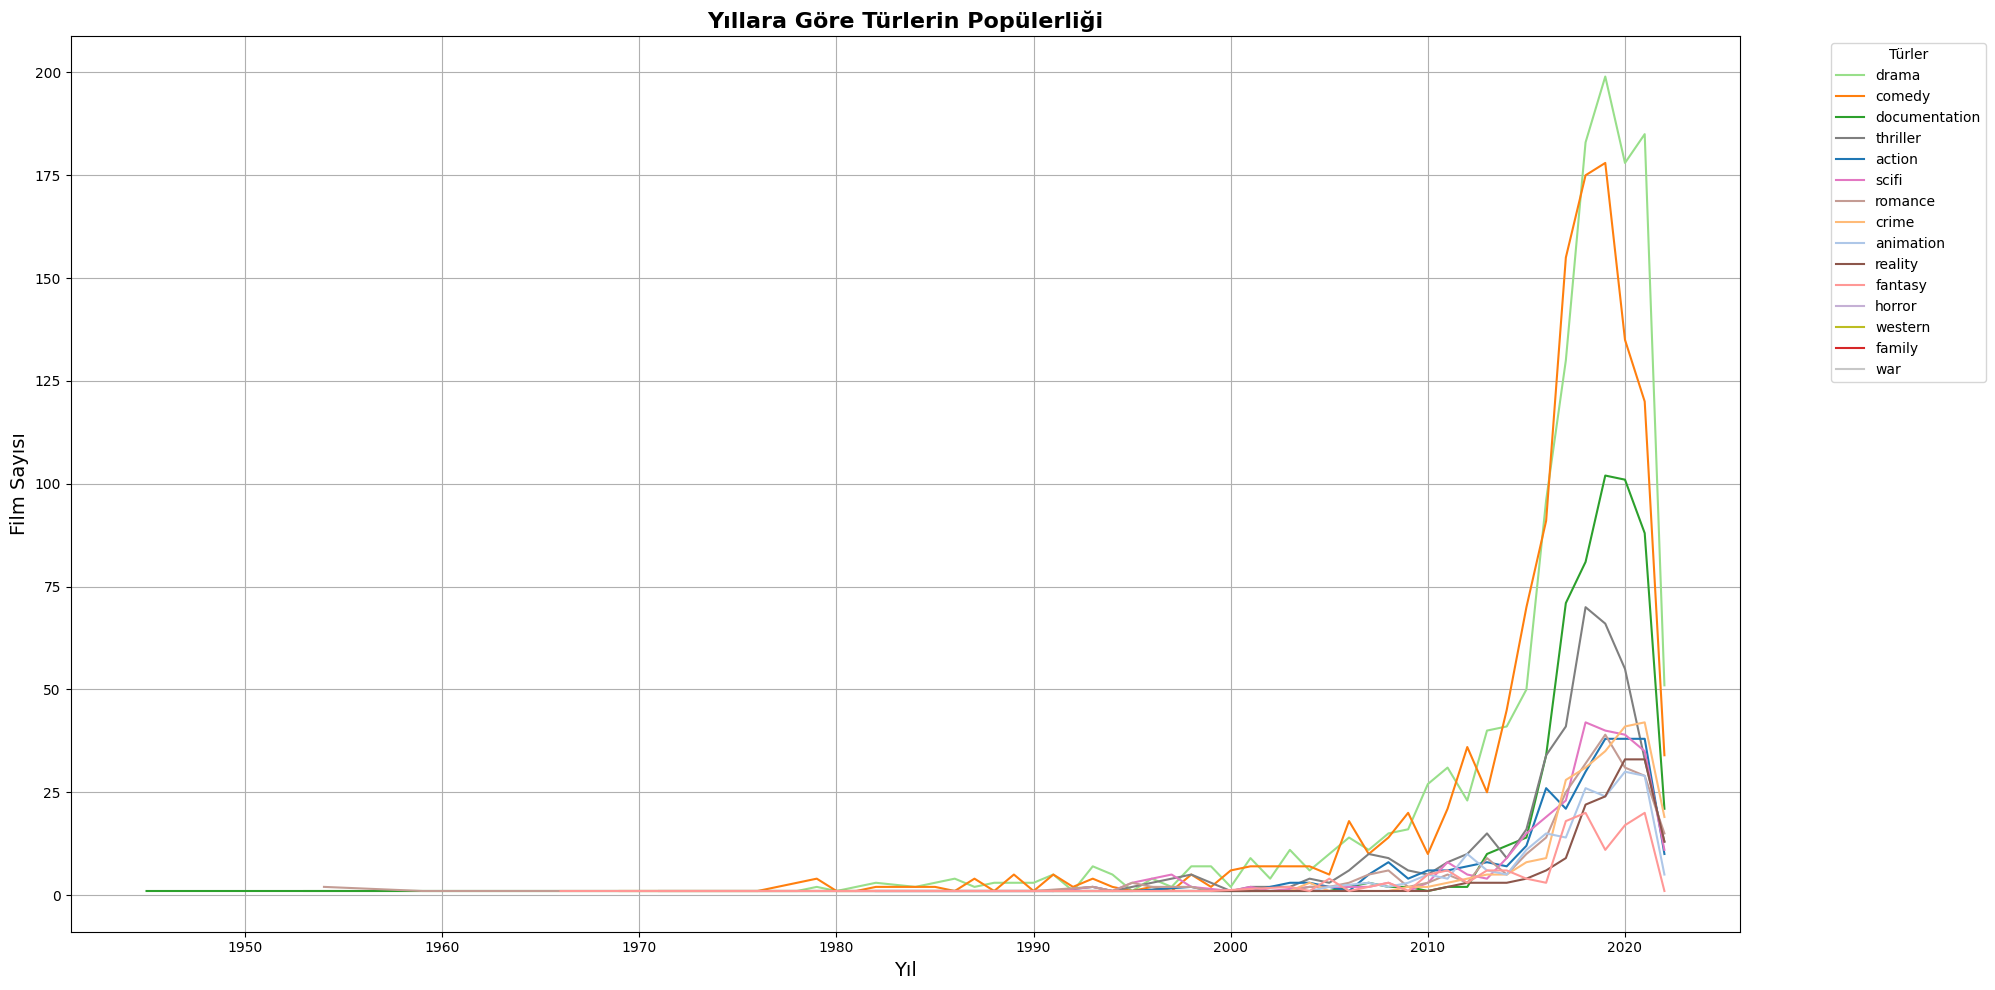

In [66]:
# Az içerik üretilen türleri belirlemek için toplam film sayısını hesaplama
toplam_sayi = yil_tur_istatistikleri.groupby('first_genre')['count'].sum()

# Eşik belirleme. bu eşikten aşağısını Other olarak sınıflandıracak
threshold = 120
yil_tur_istatistikleri['adjusted_genre'] = yil_tur_istatistikleri['first_genre'].apply(
    lambda x: x if toplam_sayi[x] >= threshold else 'Other'
)

# Tür ve yıl bazında yeniden gruplama
yenilenmis_data = yil_tur_istatistikleri.groupby(['release_year', 'adjusted_genre']).agg(
    count=('count', 'sum')
).reset_index()

# Çizgi grafiği
plt.figure(figsize=(20, 10))
sns.lineplot(x='release_year', y='count', hue='adjusted_genre', data=yenilenmis_data, palette=renk_esleme, hue_order=kategori_siralamasi)

# Grafik
plt.title('Yıllara Göre Türlerin Popülerliği', fontsize=16, fontweight='bold')
plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Film Sayısı', fontsize=14)
plt.legend(title='Türler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=0)

# Grafik gösterme
plt.tight_layout()
plt.show()


1. Genel Gözlemler:

   A. Üretim Artışı: 
      2000'li yıllardan itibaren film üretiminde belirgin bir artış gözleniyor. Özellikle 2010'dan sonra bu artış daha da hızlanmış. Bu, film endüstrisindeki genel büyüme ve teknolojik gelişmelerle açıklanabilir.
   B. Türlerin Değişen Popülerliği: 
      Türlerin popülerliği yıllar içinde değişiklik göstermiş. Bazı türler belirli dönemlerde daha popülerken, bazıları zamanla popülerliğini yitirmiş veya yeniden kazanmış.

2. Öne Çıkan Türler ve Eğilimler:

   A. Drama:
      Grafikte en belirgin ve istikrarlı türlerden biri drama. Neredeyse her dönemde varlığını korumuş ve 2010'dan sonraki üretim artışından en çok etkilenen türlerden biri olmuş. Bu, dramanın her zaman izleyiciler tarafından ilgi gördüğünü ve film yapımcıları tarafından tercih edildiğini gösteriyor.

   B. Komedi:
      Komedi de dramaya benzer şekilde istikrarlı bir popülerliğe sahip. Özellikle 2010'dan sonraki artışta dramayla birlikte öne çıkan türlerden.

   C. Belgesel (Documentation):
      Belgesel türü, grafikte daha geç dönemlerde belirginleşmeye başlamış. 2010'dan sonraki artıştan etkilenen türlerden biri ve son yıllarda popülerliğinin arttığı görülüyor. Bu, belgesel yapım tekniklerindeki gelişmeler ve artan toplumsal farkındalıkla ilişkilendirilebilir.

   D. Aksiyon (Action), Gerilim (Thriller), Bilim Kurgu (Sci-Fi):
      Bu türler de grafikte belirli dönemlerde öne çıkmış. Aksiyon ve gerilim, özellikle 2000'li yıllardan sonraki artışta önemli bir paya sahip. Bilim kurgu ise daha dalgalı bir seyir izlemiş, bazı dönemlerde daha popülerken bazı dönemlerde daha az ilgi görmüş.
      
   E. Diğer Türler:
      Romantik (Romance), Suç (Crime), Animasyon (Animation), Reality, Fantazi (Fantasy), Korku (Horror), Western, Aile (Family) gibi türler grafikte daha az belirgin. Bu, bu türlerin ya daha niş bir kitleye hitap ettiğini ya da popülerliklerinin zaman içinde daha fazla dalgalandığını gösteriyor.
   
Yıllara Göre Değişim:
   1900-1970: Bu dönemde film üretimi oldukça sınırlı. Tür çeşitliliği de az.
   1970-2000: Üretimde yavaş bir artış başlıyor. Tür çeşitliliği de artıyor.
   2000-2010: Film üretiminde belirgin bir ivme kazanılıyor. Özellikle aksiyon ve gerilim türleri öne çıkıyor.
   2010-2020: Film üretiminde patlama yaşanıyor. Drama, komedi ve belgesel gibi türler en çok üretilenler arasında. Tür çeşitliliği de en yüksek seviyede.

                                          📹📹BÖLGESEL İÇERİK TERCİHLERİ📹📹

In [67]:
# İlk ülke ve türü almak
raw['first_countries'] = raw['production_countries'].apply(lambda x: ast.literal_eval(x)[0] if x != '[]' else 'Unknown')
raw['first_genre'] = raw['first_genre']


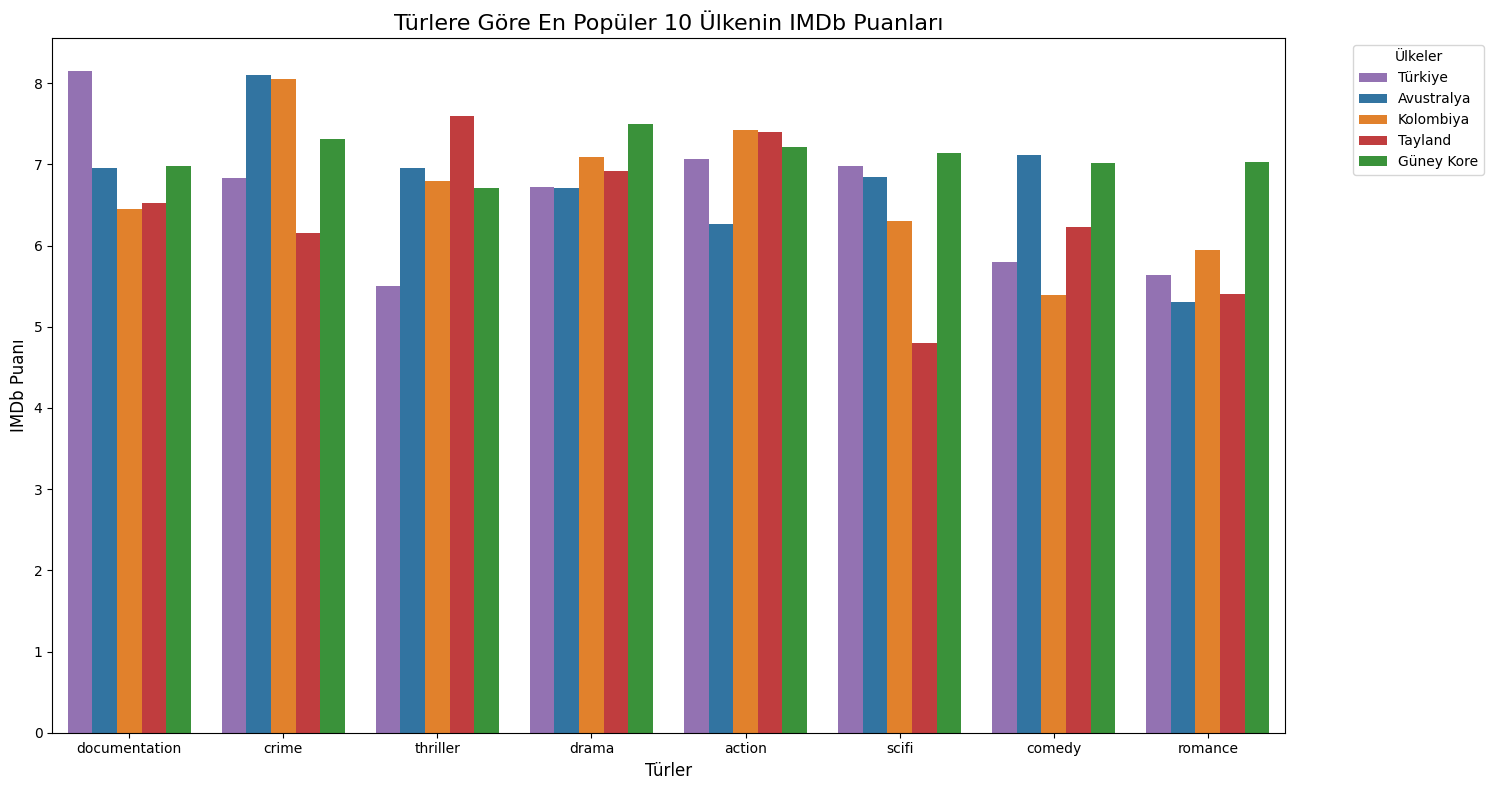

In [68]:

# secilen türler
istenecek_turler = ['drama', 'action', 'comedy', 'documentation', 'thriller', 'scifi', 'romance', 'crime']

# first_countries, first_genre ve imdb_score sütunları ile gruplama
popularity_df = raw[raw['first_genre'].isin(istenecek_turler)] \
    .groupby(['first_countries', 'first_genre']).agg({
        'imdb_score': 'mean',  # IMDb puanının ortalamasını alıyor
    }).reset_index()

# En yüksek imdb puanına sahip tür ve ülke kombinasyonlarını seçme
popularity_df_sorted = popularity_df.sort_values(by='imdb_score', ascending=False)

# En popüler 10 ü lke
top_countries = popularity_df_sorted['first_countries'].value_counts().head(5).index
popularity_df = popularity_df_sorted[popularity_df_sorted['first_countries'].isin(top_countries)]

#renk paleti
tum_ulkeler = sorted(set(popularity_df['first_countries']))
renk_paleti = sns.color_palette("tab10", n_colors=len(tum_ulkeler))
ulke_renk_esleme = dict(zip(tum_ulkeler, renk_paleti))

ulke_isimleri = {
    'TR': 'Türkiye',
    'AU': 'Avustralya',
    'CO': 'Kolombiya',
    'TH': 'Tayland',
    'KR': 'Güney Kore',
}

# Bar grafik
plt.figure(figsize=(15, 8))
sns.barplot(data=popularity_df, x='first_genre', y='imdb_score', hue='first_countries', palette=ulke_renk_esleme)
plt.title('Türlere Göre En Popüler 10 Ülkenin IMDb Puanları', fontsize=16)
plt.xlabel('Türler', fontsize=12)
plt.ylabel('IMDb Puanı', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [ulke_isimleri.get(label, label) for label in labels] 
plt.legend(handles,new_labels,title='Ülkeler', bbox_to_anchor=(1.05, 1), loc='upper left')

# grafik gösterme
plt.tight_layout()
plt.show()


Grafik, seçilen 8 tür için en popüler 5 ülkenin ortalama IMDb puanlarını göstermektedir. 

1. Grafikten çıkarılabilecek bazı sonuçlar şunlardır:

   A. Türlere Göre Puan Değişimi:

      IMDb puanları türlere göre değişiklik göstermektedir. Örneğin, belgesel türü genellikle daha yüksek puanlara sahipken, romantik ve komedi türleri daha düşük puanlara sahip olabilir.

   B. Ülkeler Arası Karşılaştırma:

      Farklı ülkelerin aynı türdeki filmleri için ortalama IMDb puanları farklılık gösterebilir. Bu, ülkelerin film yapım tarzlarındaki, kültürel farklılıklardaki veya hedef kitlelerindeki farklılıklardan kaynaklanabilir.
      
   C. En Yüksek ve En Düşük Puanlar:
   
      Grafikten hangi türlerin ve hangi ülkelerin en yüksek ve en düşük ortalama IMDb puanlarına sahip olduğu görülebilir. Örneğin, belirli bir ülke belirli bir türde diğerlerine göre belirgin şekilde daha yüksek puanlara sahip olabilir.

2. Önemli Noktalar:

   Grafik ortalama IMDb puanlarını göstermektedir. Tek tek filmlerin puanları bu ortalamaların etrafında değişiklik gösterebilir.
   "En popüler 5 ülke" ifadesi, en çok film üreten veya en çok veri bulunan 5 ülkeyi ifade eder. Bu, bu ülkelerin filmlerinin daha çok görünür olduğu veya daha çok oylandığı anlamına gelebilir.
   Grafik sadece seçilen 8 türü ve 5 ülkeyi göstermektedir. Diğer türler ve ülkeler dahil edilseydi, sonuçlar farklı olabilirdi.
   
   Özetle, bu grafik, seçilen türler için en popüler 5 ülkenin ortalama IMDb puanlarını karşılaştırmaktadır.

Yorum:
   Örneğin, grafikte Türkiye'nin belgesel türündeki ortalama IMDb puanının diğer ülkelere göre daha yüksek olduğu görülmektedir. Bu, Türkiye'de çekilen belgesel filmlerinin genel olarak daha yüksek puanlar aldığını gösterebilir. Buna karşılık, Tayland'ın aksiyon türündeki ortalama puanı diğer ülkelere göre daha düşük olabilir.

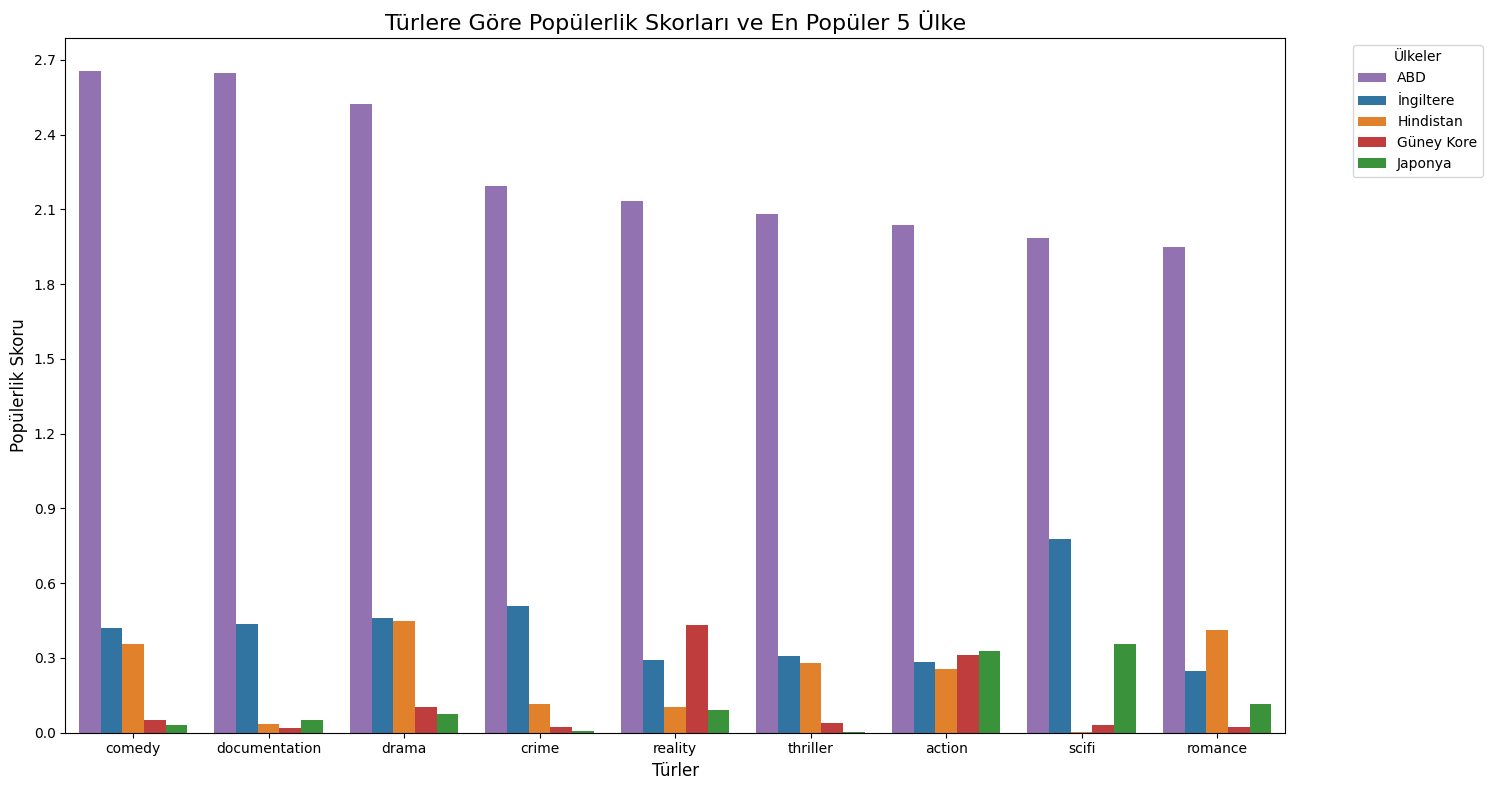

In [69]:
# Seçilen türler
istenecek_turler = ['drama', 'action', 'comedy', 'documentation', 'thriller', 'scifi', 'romance', 'crime','reality']

# Gruplama ve toplama
popularity_df = raw[raw['first_genre'].isin(istenecek_turler)] \
    .groupby(['first_countries', 'first_genre']).agg({
        'imdb_score': 'mean',   # IMDb puanının ortalaması
        'imdb_votes': 'sum',    # Oy sayılarının toplamı
        'title': 'count'        # Film sayısın
    }).reset_index()

popularity_df = popularity_df.rename(columns={'title': 'film_count'})

# Tür bazında toplam oy sayılarını hesaplama
genre_total_votes = popularity_df.groupby('first_genre')['imdb_votes'].sum().reset_index()
popularity_df = pd.merge(popularity_df, genre_total_votes, on='first_genre', suffixes=('', '_total'))

# Tür bazında ağırlıklı IMDb puanı hesaplama
popularity_df['weighted_imdb_score_by_genre'] = (popularity_df['imdb_score'] * popularity_df['imdb_votes']) / popularity_df['imdb_votes_total']

# Film sayısını 0-1 arasına ölçeklendirme (normalizasyon)
popularity_df['normalized_film_count'] = (popularity_df['film_count'] - popularity_df['film_count'].min()) / (popularity_df['film_count'].max() - popularity_df['film_count'].min())

# Popülerlik skoru. Ağırlıklı IMDb puanı ve normalize edilmiş film sayısının ortalaması
popularity_df['popularity_score'] = (popularity_df['weighted_imdb_score_by_genre'] + popularity_df['normalized_film_count']) / 2

# En yüksek popülerlik skoruna sahip tür ve ülkeleri seöme 
popularity_df_sorted = popularity_df.sort_values(by='popularity_score', ascending=False)

# En popüler 5 ülkr
top_countries = popularity_df_sorted['first_countries'].value_counts().head(5).index
popularity_df = popularity_df_sorted[popularity_df_sorted['first_countries'].isin(top_countries)]

# Tüm ülkeler ve renk paleti eşlme
tum_ulkeler = sorted(popularity_df['first_countries'].unique())
renk_paleti = sns.color_palette("tab10", n_colors=len(tum_ulkeler))
ulke_renk_esleme = dict(zip(tum_ulkeler, renk_paleti))

# kısaltmaları açan sözlük
ulke_isimleri = {
    'US': 'ABD',
    'IN': 'Hindistan',
    'KR': 'Güney Kore',
    'JP': 'Japonya',
    'GB': 'İngiltere',
}

# Grafik oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(data=popularity_df, x='first_genre', y='popularity_score', hue='first_countries', palette=ulke_renk_esleme)
# Y eksenini ayarlama
from matplotlib.ticker import MultipleLocator
plt.gca().yaxis.set_major_locator(MultipleLocator(0.3))

plt.title('Türlere Göre Popülerlik Skorları ve En Popüler 5 Ülke', fontsize=16)
plt.xlabel('Türler', fontsize=12)
plt.ylabel('Popülerlik Skoru', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [ulke_isimleri.get(label, label) for label in labels]  # Kısaltmaları tam isimlerle değiştir
plt.legend(handles, new_labels, title='Ülkeler', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grafik gösterme
plt.tight_layout()
plt.show()


***Popülerlik Skoru = [((Film IMDb Puanı * Film Oy Sayısı) / Türdeki Toplam Oy Sayısı) + ((Film Sayısı - En Düşük Film Sayısı) / (En Yüksek Film Sayısı - En Düşük Film Sayısı))] / 2***
Grafikteki her bir çubuk, belirli bir tür ve ülke için hesaplanan popülerlik skorunu temsil eder. Bu skor, yukarıda açıklanan formüle göre hesaplanmıştır. Bu nedenle, grafiği yorumlarken hem ağırlıklı IMDb puanını hem de normalize edilmiş film sayısını göz önünde bulundurmalıyız.

1. Grafikten Çıkarılabilecek Sonuçlar:

   A. ABD'nin Yüksek Skorları: 

      ABD'nin neredeyse tüm türlerde en yüksek skorlara sahip olması, hem bu türlerdeki ABD yapımı filmlerin genellikle yüksek IMDb puanlarına sahip olmasından hem de bu türlerde çok sayıda film üretmesinden kaynaklanmaktadır. Yani, ABD hem "kalite" (IMDb puanı) hem de "miktar" (film sayısı) açısından yüksek performansa sahiptir.

   B. Komedi ve Belgesel Türlerinin Yüksek Popülerliği (ABD'de):

      Özellikle ABD'de komedi ve belgesel türlerinin yüksek skorlara sahip olması, bu türlerdeki filmlerin yüksek IMDb puanlarının yanı sıra bu türlerde çok sayıda film üretilmesinden de kaynaklanmaktadır. Bu türler hem izleyiciler tarafından beğenilmekte (yüksek puanlar) hem de yapımcılar tarafından tercih edilmektedir (çok sayıda film).

   C. Diğer Ülkelerin Türlere Göre Farklılaşan Performansı:

      Diğer ülkelerin (İngiltere, Hindistan, Güney Kore, Japonya) belirli türlerde daha yüksek skorlara sahip olması, o türlerdeki filmlerinin yüksek IMDb puanlarına ve/veya o ülkede o türden daha fazla film üretilmesine bağlıdır. Örneğin, Hindistan'ın drama türünde daha yüksek bir skora sahip olması, bu ülkede drama türünde hem kaliteli filmlerin üretildiğini hem de bu türde daha fazla film üretildiğini gösterebilir.

   D. Reality ve Bilim Kurgu Türlerinin Görece Düşük Popülerliği (Bazı Ülkelerde):
   
      Bazı ülkelerde reality ve bilim kurgu türlerinin düşük skorlara sahip olması, bu türlerdeki filmlerin daha düşük IMDb puanlarına ve/veya o ülkelerde bu türde daha az film üretilmesine bağlı olabilir.

Yorum:
   Örneğin, grafikte ABD'nin komedi türündeki skoru çok yüksek. Bu, ABD'de çekilen komedi filmlerinin hem ortalama olarak yüksek IMDb puanlarına sahip olduğunu hem de bu türde çok sayıda film üretildiğini gösterir. Buna karşılık, Japonya'nın komedi türündeki skoru daha düşük. Bu, Japonya'da çekilen komedi filmlerinin ya ortalama olarak daha düşük IMDb puanlarına sahip olduğunu ya da bu türde daha az film üretildiğini gösterir.